# **Lab 2 : False Position and Secant method**<br>

The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, x<sub>l</sub> and x<sub>u</sub>, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either x<sub>l</sub> or x<sub>u</sub>, would have their functional value be closer to the zero of the function, and this would result in the new estimation x<sub>r</sub> be closer to one of the bracketing values than the mid-point x<sub>m</sub>.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function f(x) as an array of coefficients, for instance if we want to have f(x) = x<sup>3</sup>+x-2, then in python we will create an array as follows:


In [2]:
f = [1,0,1,-2]

Note that your implementation should be able to handle the array f of any size,which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array f given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array f and a point x as input and evaluate the value of the function at that point x using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array f and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most epsilon (%).

##Task 1
Implement the function for False position method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly. For the function given above, there is only one real root and it is 1.

In [1]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
  degree = len(f)
  val = 0
  for i in range(degree):
    val += (f[i]*(pow(x,(degree-(i+1)))))
  return val

In [10]:
def calError(xnew, xold):
  val = abs(xnew - xold)
  #val = val/xnew
  #val = val*100.0
  return val

In [11]:
def calcFalse(f, xl, xu):
  fxl = func(f, xl)
  fxu = func(f, xu)
  xr = (fxl*xu - fxu*xl)/(fxl - fxu)
  return xr

In [91]:
#Complete the following function

def falseposition(f, xl, xu, epsilon):
  rootListFalse = []
  errorListFalse = []
  #write your implementation here
  xr = calcFalse(f, xl, xu)
  rootListFalse.append(xr) 
  error = 1000
  while error>epsilon: 
    
    if func(f, xl)*func(f, xu)>0:
      print("No Roots")
      return
    if func(f, xl)*func(f, xr) == 0:
      break
    elif func(f, xl)*func(f, xr) < 0:
      xu = xr
    elif func(f, xl)*func(f, xr) > 0:
      xl = xr
    xrnew = calcFalse(f, xl, xu)
    error = calError(xrnew, xr)
    errorListFalse.append(error)
    xr = xrnew
    rootListFalse.append(xr)

  return xr, rootListFalse, errorListFalse

#Write a driver code here for calling the function and testing it
rootFalse, rootListFalse, errorListFalse = falseposition(f, -4,4, 0.0005)
print(rootFalse)

0.9979397778970376


## Task 2
Generate a plot of **iteration vs relative approx error (%)** for the False Position method function you implemented earlier.

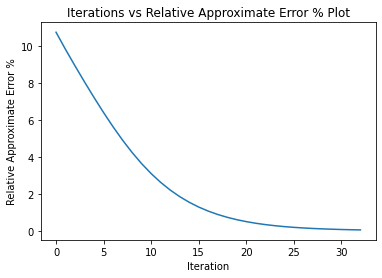

In [92]:
# Write your code for generating the graph here

import numpy as np
import matplotlib.pyplot as plt

valFalse = [error*100 for error in errorListFalse]

plt.plot(valFalse)
plt.title("Iterations vs Relative Approximate Error % Plot")
plt.xlabel("Iteration")
plt.ylabel("Relative Approximate Error %")
plt.show()

# **Secant method**
The Secant method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need two initial guesses that do not have to bracket the actual root. Secant method works by approximating the derivative that is used in **Newton Raphson method**.

## Task 3
Implement the Secant method for the above function and write a script for testing its implementation. The actual root is 1, and you can take the initial guesses for the secant as 2 and 2.2.

In [93]:
def cal_next(f, xi, xi_prev):
  fxi = func(f, xi)
  fxi_prev = func(f, xi_prev)
  x_new = xi - (fxi*(xi - xi_prev))/(fxi-fxi_prev)
  return x_new

In [94]:
Xi = 2
Xi_prev = 2.2
epsilon = 0.0005


# Complete the following function
def secant(f, Xi, Xi_prev, epsilon):
  rootList = []
  errorList = []
  #write your implementation here
  #Xi_next = cal_next(f, Xi, Xi_prev)
  #rootList.append(Xi_next) 
  error = 1000
  while error>epsilon: 
    Xi_next = cal_next(f, Xi, Xi_prev)
    error = calError(Xi_next, Xi)
    errorList.append(error)
    Xi = Xi_next
    rootList.append(Xi)

  return Xi, rootList, errorList, 

# Write a script here for calling the above function
rootSec, rootListSec, errorListSec = secant(f, Xi, Xi_prev, epsilon)
print(rootSec)

1.0005725923953575


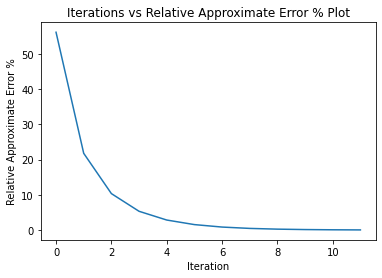

In [95]:
# Write your code for generating the graph here

import numpy as np
import matplotlib.pyplot as plt

valSec = [error*100 for error in errorListSec]

plt.plot(valSec)
plt.title("Iterations vs Relative Approximate Error % Plot")
plt.xlabel("Iteration")
plt.ylabel("Relative Approximate Error %")
plt.show()

## Task 4
Plot the **iteration vs absolute relative approximate error (%)** curves for both False position method and Secant method in the same graph and see which one converges faster.

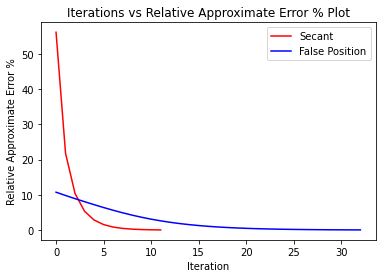

In [96]:
import numpy as np
import matplotlib.pyplot as plt

valSec = [error*100 for error in errorListSec]

plt.plot(valSec, "r", label = 'Secant')
plt.plot(valFalse, "b", label = 'False Position')
plt.title("Iterations vs Relative Approximate Error % Plot")
plt.xlabel("Iteration")
plt.ylabel("Relative Approximate Error %")
plt.legend()
plt.show()